# Data Preprocessing

## Imports

In [361]:
# Basic imports
import pandas as pd
import numpy as np
import copy
import re

# Visualization imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# sklearn imports
from sklearn.experimental import enable_halving_search_cv
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix, roc_curve, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# NLTK imports
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import wordnet, stopwords
from nltk import pos_tag, WordNetLemmatizer

# NLTK downloads
# nltk.download('averaged_perceptron_tagger')
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('omw-1.4')

ImportError: HalvingGridSearchCV is experimental and the API might change without any deprecation cycle. To use it, you need to explicitly import enable_halving_search_cv:
from sklearn.experimental import enable_halving_search_cv

## Looking at the Data

In [2]:
df = pd.read_csv(
    '/Users/Arsh/Documents/GitHub/Capstone_Project/Capstone Project Dataframe')
df = df.drop(columns=['Unnamed: 0', 'Tweet ID'])
df_original = copy.deepcopy(df)

In [3]:
# Sanity check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285112 entries, 0 to 285111
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Date             285112 non-null  object
 1   Tweet            285112 non-null  object
 2   Username         285112 non-null  object
 3   Political_Score  285112 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 8.7+ MB


In [4]:
df.corr()

/var/folders/fj/lrd_k_6101d6d8l_gnt9pv480000gn/T/ipykernel_6066/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Political_Score
Political_Score,1.0


In [5]:
df.Tweet.iloc[37493]

'No Iceland is not the first, the US did his about 50 years ago. Good thing he’s not in government so he wouldn’t know about The Equal Pay Act of 1963... oh wait. https://t.co/ZqB6CfJ233'

##  Preprocessing

I will clean all of the tweets in my data and get it ready for NLP. 

### Tokenization 

In [6]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
# I removed some stop words as, IMO, they remove context in the tweets that signify meaning.
my_stopwords = ['i',
                'me',
                'my',
                'myself',
                'we',
                'our',
                'ours',
                'ourselves',
                'you',
                "you're",
                "you've",
                "you'll",
                "you'd",
                'your',
                'yours',
                'yourself',
                'yourselves',
                'he',
                'him',
                'his',
                'himself',
                'she',
                "she's",
                'her',
                'hers',
                'herself',
                'it',
                "it's",
                'its',
                'itself',
                'they',
                'them',
                'their',
                'theirs',
                'themselves',
                'what',
                'which',
                'who',
                'whom',
                'this',
                'that',
                "that'll",
                'these',
                'those',
                'am',
                'is',
                'are',
                'was',
                'were',
                'be',
                'been',
                'being',
                'have',
                'has',
                'had',
                'having',
                'do',
                'does',
                'did',
                'doing',
                'a',
                'an',
                'the',
                'and',
                'but',
                'if',
                'or',
                'because',
                'as',
                'until',
                'while',
                'of',
                'at',
                'by',
                'for',
                'with',
                'about',
                'between',
                'into',
                'through',
                'during',
                'before',
                'after',
                'above',
                'below',
                'to',
                'from',
                'up',
                'down',
                'in',
                'out',
                'on',
                'off',
                'over',
                'under',
                'again',
                'further',
                'then',
                'once',
                'here',
                'there',
                'when',
                'where',
                'why',
                'how',
                'all',
                'any',
                'both',
                'each',
                'few',
                'more',
                'most',
                'other',
                'some',
                'such',
                'only',
                'own',
                'same',
                'so',
                'than',
                'too',
                'very',
                's',
                't',
                'can',
                'will',
                'just',
                'don',
                "don't",
                'should',
                "should've",
                'now',
                'd',
                'll',
                'm',
                'o',
                're',
                've',
                'y',
                'ain',
                'aren',
                "aren't",
                'couldn',
                "couldn't",
                'didn',
                "didn't",
                "doesn't",
                'hadn',
                "hadn't",
                'hasn',
                "hasn't",
                'haven',
                "haven't",
                'isn',
                "isn't",
                'ma',
                'mightn',
                "mightn't",
                'mustn',
                "mustn't",
                'needn',
                "needn't",
                'shan',
                "shan't",
                "shouldn't",
                "wasn't",
                "weren't",
                'won',
                "won't",
                "wouldn't"]

In [8]:
df.Tweet.iloc[37493]

'No Iceland is not the first, the US did his about 50 years ago. Good thing he’s not in government so he wouldn’t know about The Equal Pay Act of 1963... oh wait. https://t.co/ZqB6CfJ233'

In [9]:
tknzr = TweetTokenizer(
    strip_handles=True, reduce_len=True, preserve_case=False)

The parameters in the tokenizer remove @handles, lowercases all words, and reduces the length of exaggerated grammar (such as turning looooool into loool.)

In [10]:
def tweet_preprocessor(tweet, min_tok):

    wnl = WordNetLemmatizer()

    def pos_tagger(nltk_tag):
        if nltk_tag.startswith('J'):
            return wordnet.ADJ
        elif nltk_tag.startswith('N'):
            return wordnet.NOUN
        elif nltk_tag.startswith('R'):
            return wordnet.ADV
        elif nltk_tag.startswith('V'):
            return wordnet.VERB
        else:
            return None

    tweet_sweeper = tweet.lower()
    tweet_sweeper = re.sub(r"@[a-z0-9_]+|#[a-z0-9_]+|http\S+", "",
                           tweet_sweeper).strip().replace("\r", "").replace("\n", "").replace("\t", "")
    clean_tweet = [x for x in tknzr.tokenize(tweet_sweeper) if (
        (x.isalpha()) & (x not in my_stopwords))]
    wordnet_tagged = list(
        map(lambda x: (x[0], pos_tagger(x[1])), pos_tag(clean_tweet)))

    if len(wordnet_tagged) < min_tok:
        return ''
    else:
        clean_tweet = " ".join([wnl.lemmatize(x[0], x[1])
                               for x in wordnet_tagged if x[1] is not None])
        return clean_tweet

In [11]:
#df.Tweet = df.Tweet.apply(tweet_preprocessor, min_tok=8)

In [12]:
#processed_tweets = df[df['Tweet'] != '']

In [13]:
#processed_tweets.to_csv('Processed Tweets')
processed_tweets = pd.read_csv('/Users/Arsh/Documents/GitHub/Capstone_Project/Processed Tweets')
processed_tweets = processed_tweets.drop(columns=['Unnamed: 0'])
processed_tweets = processed_tweets.reset_index(drop=True)
processed_tweets

,Date,Tweet,Username,Political_Score
0,2017-01-20,let stand people deserve access health care wa...,KamalaHarris,1
1,2017-01-20,congratulation become president lot work wait ...,LeaderMcConnell,0
2,2017-01-20,honor life serve country president vice presid...,VP45,0
3,2017-01-20,thought prayer west liberty high school thankf...,Jim_Jordan,0
4,2017-01-20,victory arizonan successful effort block acre ...,RepGosar,0
...,...,...,...,...
236649,2022-11-01,true bad democrat big tech favorite category m...,tedcruz,0
236650,2022-11-01,election day week visit make plan vote vote de...,TheDemocrats,1
236651,2022-11-01,border crisis create fentanyl epidemic ravagin...,RepBoebert,0
236652,2022-11-01,clear choice arizona ready put arizona family ...,GOP,0


In [14]:
processed_tweets.Political_Score.value_counts()

1    127634
0    109020
Name: Political_Score, dtype: int64

In [15]:
X = processed_tweets['Tweet']
y = processed_tweets['Political_Score']

## Baseline Model - Multinomial Naive Bayes

In [16]:
cv = CountVectorizer(max_features = 10000)
clf = GaussianNB()

In [17]:
X_fit_transformed = cv.fit_transform(X)

In [18]:
X_fit_transformed

<236654x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 3538235 stored elements in Compressed Sparse Row format>

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
           X_fit_transformed, y, test_size = 0.2, stratify = y, random_state = 95)

In [20]:
# Cannot be done in a previous step as test train splitting on a large array breaks the kernel : )
X_train = X_train.toarray()
X_test = X_test.toarray()

In [21]:
len(X_test)

47331

In [22]:
clf.fit(X_train, y_train)

GaussianNB()

In [23]:
y_pred = clf.predict(X_test)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


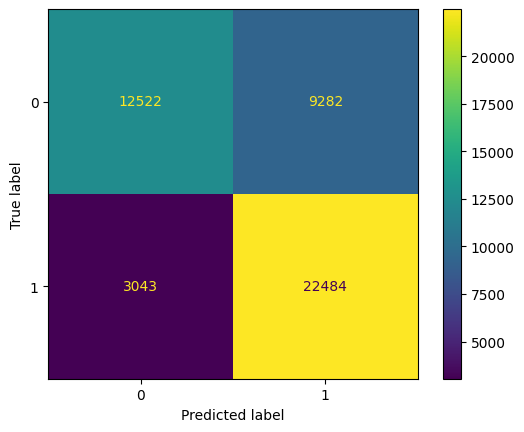

In [24]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67     21804
           1       0.71      0.88      0.78     25527

    accuracy                           0.74     47331
   macro avg       0.76      0.73      0.73     47331
weighted avg       0.75      0.74      0.73     47331



In [26]:
roc_auc_score(y_test, y_pred)

0.7275455899274552

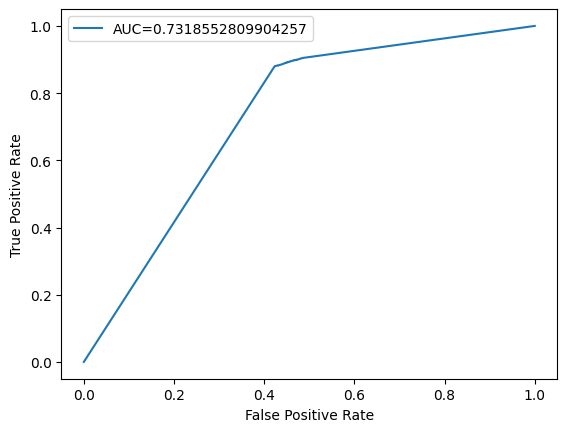

In [27]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Very successful for a baseline model. Let's play around with the parameters. In the baseline, I used the top 10,000 features or used the top 10,000 words in the corpus. 

## Finetuning the NB Model

In [28]:
### Playing with the parameters

In [29]:
cv_ft = CountVectorizer(max_features = 2200)

In [30]:
X_fit_tra_ft = cv_ft.fit_transform(X)

In [31]:
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(
           X_fit_tra_ft, y, test_size = 0.2, stratify = y, random_state = 95)

In [32]:
X_train_ft = X_train_ft.toarray()
X_test_ft = X_test_ft.toarray()

In [33]:
clf.fit(X_train_ft, y_train_ft)

GaussianNB()

In [34]:
y_pred_ft = clf.predict(X_test_ft)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


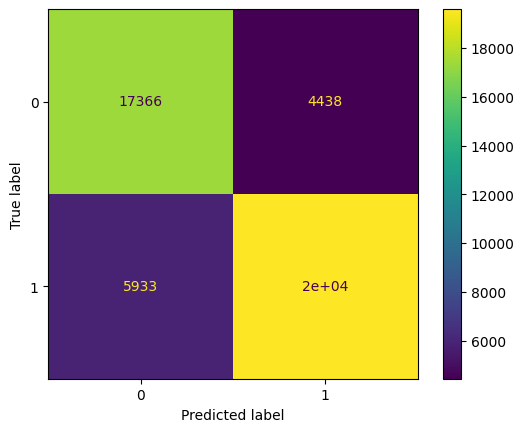

In [35]:
plot_confusion_matrix(clf, X_test_ft, y_test_ft)  
plt.show()

In [36]:
print(classification_report(y_test_ft, y_pred_ft))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77     21804
           1       0.82      0.77      0.79     25527

    accuracy                           0.78     47331
   macro avg       0.78      0.78      0.78     47331
weighted avg       0.78      0.78      0.78     47331



In [37]:
roc_auc_score(y_test_ft, y_pred_ft)

0.7820193954800985

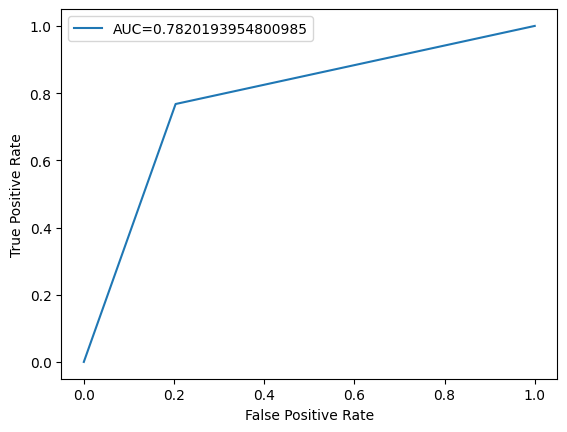

In [38]:
fpr, tpr, _ = metrics.roc_curve(y_test_ft,  y_pred_ft)
auc = metrics.roc_auc_score(y_test_ft, y_pred_ft)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

I think this is the best I can finetune with a CountVectorizer. 

### Finetuning the baseline model with a TFID vectorizer

In [39]:
tfidf = TfidfVectorizer(max_features = 10000)

In [40]:
X_tfidf = tfidf.fit_transform(X)

In [41]:
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(
           X_tfidf, y, test_size = 0.2, stratify = y, random_state = 95)

In [42]:
X_train_tfidf= X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

In [43]:
clf.fit(X_train_tfidf, y_train_tfidf)

GaussianNB()

In [44]:
y_pred_tfidf = clf.predict(X_test_tfidf)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


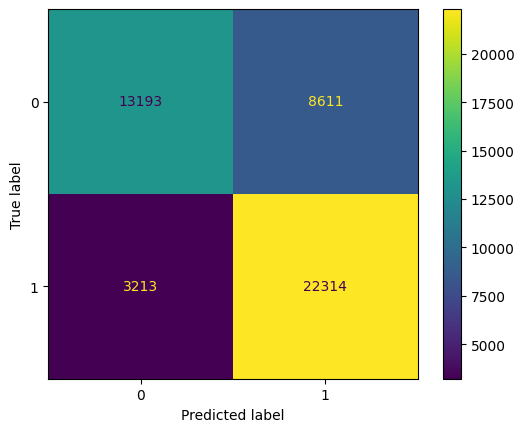

In [45]:
plot_confusion_matrix(clf, X_test_tfidf, y_test_tfidf)  
plt.show()

In [46]:
print(classification_report(y_test_tfidf, y_pred_tfidf))

              precision    recall  f1-score   support

           0       0.80      0.61      0.69     21804
           1       0.72      0.87      0.79     25527

    accuracy                           0.75     47331
   macro avg       0.76      0.74      0.74     47331
weighted avg       0.76      0.75      0.74     47331



In [47]:
roc_auc_score(y_test_tfidf, y_pred_tfidf)

0.7396028672113586

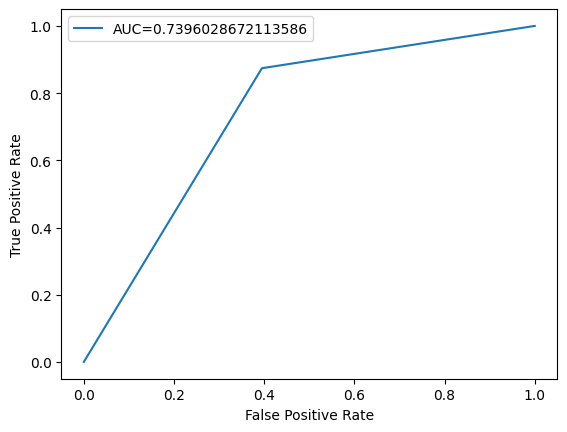

In [48]:
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf,  y_pred_tfidf)
auc = metrics.roc_auc_score(y_test_tfidf, y_pred_tfidf)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

This is the new baseline for tfidf. Without any parameter tuning, this is on par with the countvectorizer. 

### Naive Bayes - with TFIDF vectorizer - Model Tuning

In [320]:
tfidf = TfidfVectorizer(max_features = 2500, min_df = 200)

In [321]:
X_tfidf_ft = tfidf.fit_transform(X)

In [322]:
X_train_tfidf_ft, X_test_tfidf_ft, y_train_tfidf_ft, y_test_tfidf_ft = train_test_split(
           X_tfidf_ft, y, test_size = 0.1, stratify = y, random_state = 95)

In [323]:
X_train_tfidf_ft= X_train_tfidf_ft.toarray()
X_test_tfidf_ft = X_test_tfidf_ft.toarray()

In [324]:
clf.fit(X_train_tfidf_ft, y_train_tfidf_ft)

GaussianNB()

In [325]:
y_pred_tfidf_ft = clf.predict(X_test_tfidf_ft)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


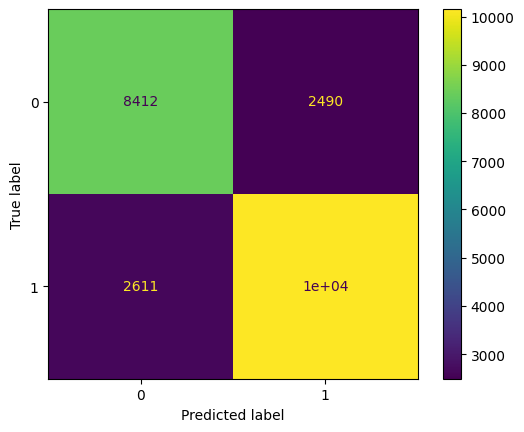

In [326]:
plot_confusion_matrix(clf, X_test_tfidf_ft, y_test_tfidf_ft)  
plt.show()

In [327]:
print(classification_report(y_test_tfidf_ft, y_pred_tfidf_ft))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77     10902
           1       0.80      0.80      0.80     12764

    accuracy                           0.78     23666
   macro avg       0.78      0.78      0.78     23666
weighted avg       0.78      0.78      0.78     23666



In [328]:
roc_auc_score(y_test_tfidf_ft, y_pred_tfidf_ft)

0.7835209209238904

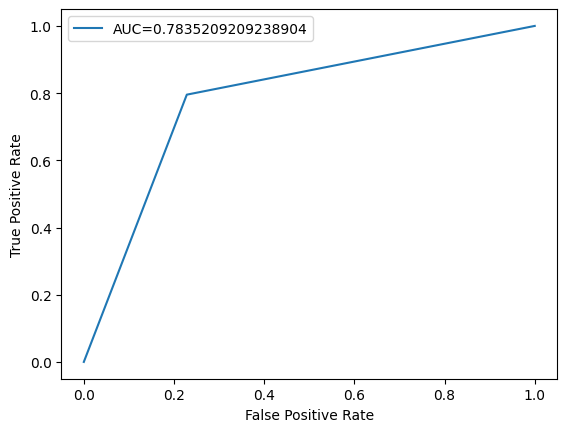

In [329]:
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf_ft,  y_pred_tfidf_ft)
auc = metrics.roc_auc_score(y_test_tfidf_ft, y_pred_tfidf_ft)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

I think we have hit the limitation of what can be done with a Naive Bayes classifier. We struggle to go beyong 0.78 in terms of  F1 score. Now, I will move on to using decsions trees and random forests.

## Random Forest

In [346]:
forest_pipe = Pipeline([('model', RandomForestClassifier(n_estimators = 100, random_state = 95))])

For this model, I will use the already vectorized data from the tfidf model. 

In [347]:
forest_pipe.fit(X_train_tfidf_ft, y_train_tfidf_ft)

Pipeline(steps=[('model', RandomForestClassifier(random_state=95))])

In [348]:
y_forest_pred = forest_pipe.predict(X_test_tfidf_ft)

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.


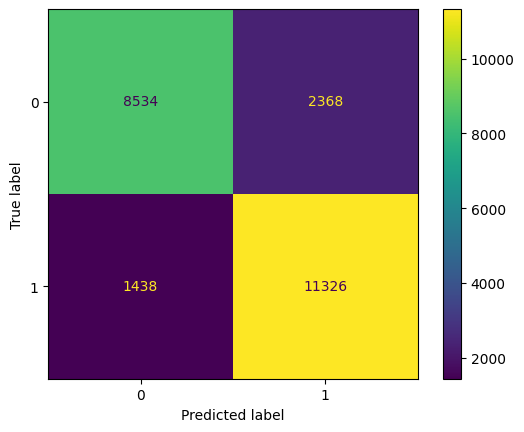

In [349]:
plot_confusion_matrix(forest_pipe, X_test_tfidf_ft, y_test_tfidf_ft)  
plt.show()

In [350]:
print(classification_report(y_test_tfidf_ft, y_forest_pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82     10902
           1       0.83      0.89      0.86     12764

    accuracy                           0.84     23666
   macro avg       0.84      0.84      0.84     23666
weighted avg       0.84      0.84      0.84     23666



In [351]:
roc_auc_score(y_test_tfidf_ft, y_forest_pred)

0.8350657701348977

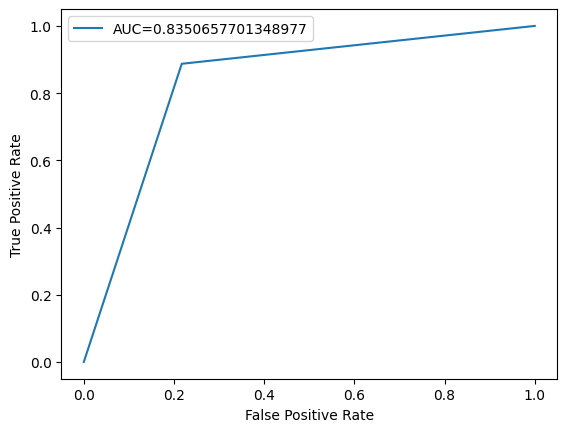

In [352]:
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf_ft,  y_forest_pred)
auc = metrics.roc_auc_score(y_test_tfidf_ft, y_forest_pred)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

This is excellent. Off the bat, this is far more optimal than the other models. Now for model tuning.

## Finetuning the Random Forest Model

In [ ]:
halving_cv = HalvingGridSearchCV(forest_pipe, forest_params, scoring="roc_auc", n_jobs=-1, min_resources="exhaust", factor=3
)

_ = halving_cv.fit(X_train_tfidf_ft, y_train_tfidf_ft)


In [358]:
#forest_params = {'model__n_estimators': [50, 100, 200, 250, 300, 400, 500] , 'model__criterion' : ['gini', 'entropy'],
             'model__min_samples_leaf': [1, 3, 5, 7, 9, 11], 'model__max_features': [20, 30, 40, 50, 60, 70], 'model__bootstrap' : [True, False]}
#forest_cv = GridSearchCV(estimator = forest_pipe, param_grid = forest_params, cv = 5)
#forest_cv.fit(X_train_tfidf_ft, y_train_tfidf_ft)

KeyboardInterrupt: 

In [ ]:
forest_cv.best_score_

In [ ]:
forest_cv.best_params_

In [ ]:
optimal_model = forest_cv.best_estimator_
optimal_model

In [ ]:
y_forest_pred_ft = optimal_model.predict(X_test_tfidf_ft)

In [ ]:
plot_confusion_matrix(optimal_model, X_test_tfidf_ft, y_test_tfidf_ft)  
plt.show()

In [ ]:
print(classification_report(y_test_tfidf_ft, y_forest_pred_ft))

In [ ]:
roc_auc_score(y_test_tfidf_ft, y_forest_pred_ft)

In [ ]:
fpr, tpr, _ = metrics.roc_curve(y_test_tfidf_ft,  y_forest_pred_ft)
auc = metrics.roc_auc_score(y_test_tfidf_ft, y_forest_pred_ft)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()